# *Import Whale data using Kaggle API*

*   캐글 API를 이용해 코랩 내 데이터 불러오기



In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Get the latest version of Kaggle
!pip uninstall -y kaggle
!pip install --upgrade pip
!pip install kaggle==1.5.6

Found existing installation: kaggle 1.5.12
Uninstalling kaggle-1.5.12:
  Successfully uninstalled kaggle-1.5.12
     |████████████████████████████████| 2.1 MB 5.4 MB/s 
  Attempting uninstall: pip
    Found existing installation: pip 21.1.3
    Uninstalling pip-21.1.3:
      Successfully uninstalled pip-21.1.3
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.2/58.2 KB 3.8 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for kaggle: filename=kaggle-1.5.6-py3-none-any.whl size=72858 sha256=8e8cdcb04f7d6dd9da9cf76f3712e776474d7acf95c6c0d030ad3b54d67d7bd4
  Stored in directory: /root/.cache/pip/wheels/aa/e7/e7/eb3c3d514c33294d77ddd5a856bdd58dc9c1fabbed59a02a2b
Successfully built kaggle


In [4]:
# import the Kaggle API
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shinnnpark","key":"be3a0f6b43267afbc7e74714b52517bd"}'}

In [5]:
ls -1ha kaggle.json

kaggle.json


In [6]:
# Check if you're well connected to your kaggle ID

!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
# Permission Warning 이 일어나지 않도록 
!chmod 600 ~/.kaggle/kaggle.json
# 본인이 참가한 모든 대회 보기 
!kaggle competitions list

ref                                            deadline             category            reward  teamCount  userHasEntered  
---------------------------------------------  -------------------  ---------------  ---------  ---------  --------------  
contradictory-my-dear-watson                   2030-07-01 23:59:00  Getting Started     Prizes         58           False  
gan-getting-started                            2030-07-01 23:59:00  Getting Started     Prizes         87           False  
store-sales-time-series-forecasting            2030-06-30 23:59:00  Getting Started  Knowledge       1023           False  
tpu-getting-started                            2030-06-03 23:59:00  Getting Started  Knowledge        163           False  
digit-recognizer                               2030-01-01 00:00:00  Getting Started  Knowledge       1912           False  
titanic                                        2030-01-01 00:00:00  Getting Started  Knowledge      14246           False  
house-pr

In [7]:
# Competition Data Download
! kaggle competitions download -c happy-whale-and-dolphin

100% 57.6G/57.7G [08:02<00:00, 187MB/s]
100% 57.7G/57.7G [08:02<00:00, 128MB/s]


In [8]:
# Extract All the zipfiles and remove them
!unzip '*.zip'
!rm *.zip

스트리밍 출력 내용이 길어서 마지막 5000줄이 삭제되었습니다.
  inflating: train_images/e7bc059aee4278.jpg  
  inflating: train_images/e7bdb883f8c192.jpg  
  inflating: train_images/e7be23bf6653c8.jpg  
  inflating: train_images/e7be96514ee807.jpg  
  inflating: train_images/e7c0df0b76833c.jpg  
  inflating: train_images/e7c17317474d34.jpg  
  inflating: train_images/e7c36c00dd51af.jpg  
  inflating: train_images/e7c7fef8d408ca.jpg  
  inflating: train_images/e7ca953a8b7a2e.jpg  
  inflating: train_images/e7d1574453ba7f.jpg  
  inflating: train_images/e7d1cdb2fdf583.jpg  
  inflating: train_images/e7d2503911061d.jpg  
  inflating: train_images/e7d2b70e19ca38.jpg  
  inflating: train_images/e7d4d607c23594.jpg  
  inflating: train_images/e7d925d05331af.jpg  
  inflating: train_images/e7da024ea3cc0b.jpg  
  inflating: train_images/e7dc4488aad32e.jpg  
  inflating: train_images/e7dd864353d346.jpg  
  inflating: train_images/e7ddeee28f524b.jpg  
  inflating: train_images/e7e07a795435a1.jpg  
  inflating: train_image

In [9]:
# Check where you are
# !pwd

# Check the file lists at the current directory ('/content')
!ls '/content'

drive	     sample_data	    test_images  train_images
kaggle.json  sample_submission.csv  train.csv


# *Load data & EDA*


*   학습데이터 불러오기
*   EDA를 통한 데이터 확인



In [23]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from collections import Counter, defaultdict
from PIL import Image
import os
import io
from pathlib import Path

In [3]:
import pandas as pd

# Check out the info of training set
train_csv = pd.read_csv('train.csv', encoding='utf-8')
print(train_csv.shape)
train_csv.head(10)

(51033, 3)


,image,species,individual_id
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9
1,000562241d384d.jpg,humpback_whale,1a71fbb72250
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392
5,000a8f2d5c316a.jpg,bottlenose_dolphin,b9907151f66e
6,000be9acf46619.jpg,beluga,afb9b3978217
7,000bef247c7a42.jpg,humpback_whale,444d8894ccc8
8,000c3d63069748.jpg,beluga,df94b15285b9
9,000c476c11bad5.jpg,bottlenose_dolphin,b11b2404c7e3


In [4]:
import pandas as pd

sample = pd.read_csv('sample_submission.csv', encoding='utf-8')
sample.shape
sample.head(10)

,image,predictions
0,000110707af0ba.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
1,0006287ec424cb.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
2,000809ecb2ccad.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
3,00098d1376dab2.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
4,000b8d89c738bd.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
5,000e246888710c.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
6,000eb6e73a31a5.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
7,000fe6ebfc9893.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
8,0011f7a65044e4.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...
9,0012ff300032e3.jpg,37c7aba965a5 114207cab555 a6e325d8e924 19fbb96...


In [5]:
# check out the target label: 'individual_id'
# label the nonexistent data as 'new_individual'
sample_1 = sample['predictions'][0].split(' ')
print(sample_1, '\n')

# an image list of a specific individual, '37c7aba965a5'
train_csv[train_csv['individual_id'] == sample_1[0]]

['37c7aba965a5', '114207cab555', 'a6e325d8e924', '19fbb960f07d', 'new_individual'] 



,image,species,individual_id
48,0046ceef89b3fc.jpg,minke_whale,37c7aba965a5
62,005e53b1b6aada.jpg,minke_whale,37c7aba965a5
174,0106d276033b78.jpg,minke_whale,37c7aba965a5
226,014ba64e8ce8ec.jpg,minke_whale,37c7aba965a5
253,01637f0b588ed8.jpg,minke_whale,37c7aba965a5
...,...,...,...
50006,fac55ca7d54b1f.jpg,minke_whale,37c7aba965a5
50301,fc55728208d315.jpg,minke_whale,37c7aba965a5
50373,fca53e45c649d7.jpg,minke_whale,37c7aba965a5
50468,fd20e39ea4eb03.jpg,minke_whale,37c7aba965a5


height, width:  (3599, 2399)
image has 3 channels


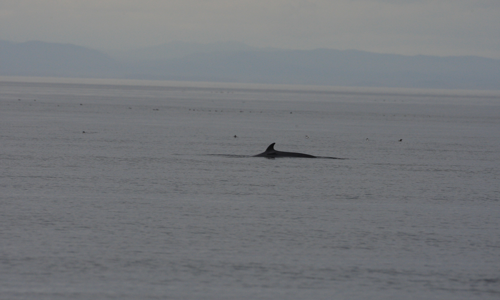

In [24]:
# Display a random image
path = './train_images/005e53b1b6aada.jpg'

with open(path, 'rb') as f:
    data = f.read()

data_io = io.BytesIO(data)
img = Image.open(data_io)

print('height, width: ', img.size)

# find number of channels
if np.array(img).ndim == 2:
    channels = 1
    print("image has 1 channel")
else:
    channels = np.array(img).shape[-1]
    print("image has", channels, "channels")

img = img.resize((500,300)) # resize the image
display(img)

In [7]:
class Highlight:
   BOLD = '\033[1m'
   UNDERLINE = '\033[4m'
   END = '\033[0m'

print(Highlight.BOLD+'Number of Species :'+Highlight.END, train_csv['species'].nunique())
print(Highlight.BOLD+'Number of Individuals :'+Highlight.END, train_csv['individual_id'].nunique())
print(Highlight.BOLD+'Number of Images :'+Highlight.END, train_csv['image'].nunique(), '\n')

print(Highlight.BOLD+'Number of Nulls :'+Highlight.END) # 0 Nulls
print(train_csv.isna().sum(), '\n')

print(train_csv.shape)

Number of Species : 30
Number of Individuals : 15587
Number of Images : 51033 

Number of Nulls :
image            0
species          0
individual_id    0
dtype: int64 

(51033, 3)


*Species of Whales (Quite close to one another if they're in the same species)* 

bottlenose_dolphin           9664
beluga                       7443
humpback_whale               7392
blue_whale                   4830
false_killer_whale           3326
dusky_dolphin                3139
spinner_dolphin              1700
melon_headed_whale           1689
minke_whale                  1608
killer_whale                 1493
fin_whale                    1324
gray_whale                   1123
bottlenose_dolpin            1117
kiler_whale                   962
southern_right_whale          866
spotted_dolphin               490
sei_whale                     428
short_finned_pilot_whale      367
common_dolphin                347
cuviers_beaked_whale          341
pilot_whale                   262
long_finned_pilot_whale       238
white_sided_dolphin           229
brydes_whale                  154
pantropic_spotted_dolphin     145
globis                        116
commersons_dolphin             90
pygmy_killer_whale             76
rough_toothed_dolphin          60
frasiers_dolph

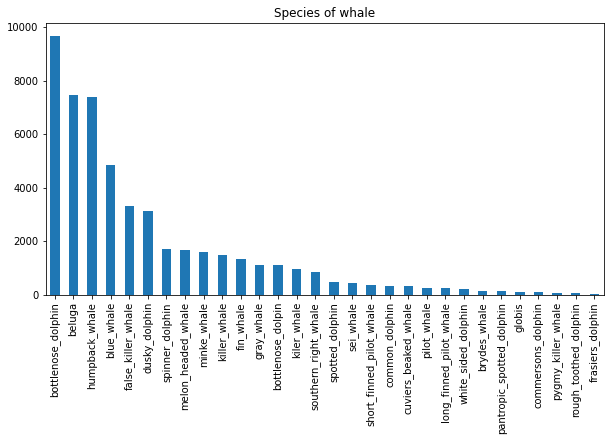

In [8]:
# Count the num of species and Visualize it with bar chart

counts_species = train_csv['species'].value_counts()
print(counts_species, '\n\n')
counts_species.plot(kind='bar', figsize=(10,5), title='Species of whale')

In [9]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

from collections import Counter, defaultdict
from PIL import Image
import os
import io
from pathlib import Path

In [29]:
def show_images(article_ids, cols=1, rows=-1):
    if isinstance(article_ids, int) or isinstance(article_ids, str):
        article_ids = [article_ids]
    article_count = len(article_ids)
    if rows < 0: rows = (article_count // cols) + 1
    plt.figure(figsize=(3 + 3.5 * cols, 3 + 5 * rows))
    for i in range(article_count):
        article_id = str(article_ids[i])
        plt.subplot(rows, cols, i + 1)
        plt.axis('off')
        plt.title(article_id)
        try:
            image = Image.open(f'./train_images/{article_id}')
            plt.imshow(image)
        except:
            pass

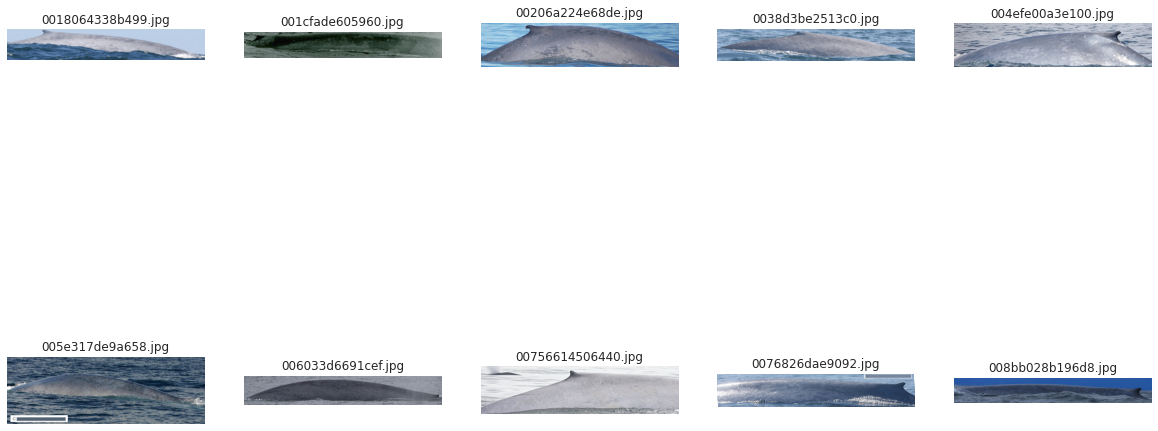

In [30]:
sample_species = counts_species.index[3]
jpg_species = list(train_csv[train_csv['species'] == sample_species]['image'])
show_images(jpg_species[:10], 5)

*Individual Ids of Whales*

In [53]:
# Count the num of species and Visualize it with bar chart

counts_ids = train_csv['individual_id'].value_counts()
print(counts_ids, '\n\n')
print(Highlight.BOLD+'Total number of Ids: '+Highlight.END, len(counts_ids))
print(Highlight.BOLD+'Ids having under 5 shots (%): '+Highlight.END, round(len(counts_ids[counts_ids<5])/len(counts_ids)*100, 2),'%')
print(Highlight.BOLD+'Ids having only 1 shot (%): '+Highlight.END, round(len(counts_ids[counts_ids==1])/len(counts_ids)*100, 2),'%')

37c7aba965a5    400
114207cab555    168
a6e325d8e924    155
19fbb960f07d    154
c995c043c353    153
               ... 
7da30c559ad2      1
882c59ba34bb      1
704e724a033f      1
08983c540e76      1
bc6fcab946c4      1
Name: individual_id, Length: 15587, dtype: int64 


Total number of Ids:  15587
Ids having under 5 shots (%):  88.94 %
Ids having only 1 shot (%):  59.4 %


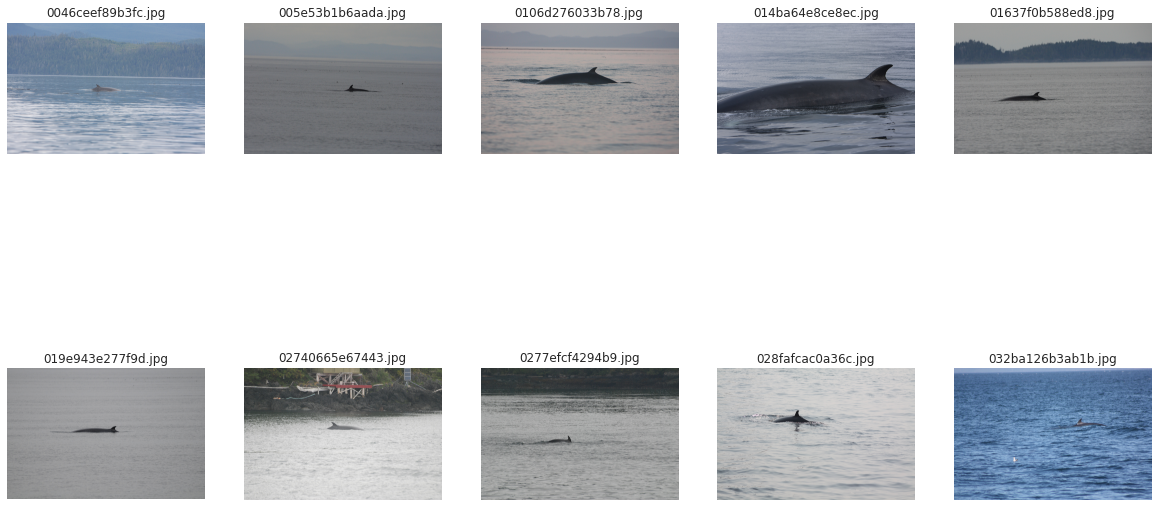

In [55]:
sample_ids = counts_ids.index[0]
jpg_ids = list(train_csv[train_csv['individual_id'] == sample_ids]['image'])
show_images(jpg_ids[:10], 5)

# *Data preprocessing for Siamese Network*

*   샴네트워크 적용을 위한 데이터전처리 (pairing)



In [57]:
# Import label encoder
from sklearn import preprocessing
# label_encoder object knows how to understand word labels. 
label_encoder = preprocessing.LabelEncoder()
# Encode labels in column 'Country'. 
train_csv['label']= label_encoder.fit_transform(train_csv['individual_id']) 
train_csv.head()

,image,species,individual_id,label
0,00021adfb725ed.jpg,melon_headed_whale,cadddb1636b9,12348
1,000562241d384d.jpg,humpback_whale,1a71fbb72250,1636
2,0007c33415ce37.jpg,false_killer_whale,60008f293a2b,5842
3,0007d9bca26a99.jpg,bottlenose_dolphin,4b00fe572063,4551
4,00087baf5cef7a.jpg,humpback_whale,8e5253662392,8721


In [201]:
import tensorflow as tf
import keras
from keras.preprocessing.image import img_to_array, load_img, array_to_img
from keras.applications.vgg16 import VGG16
from keras.preprocessing import image
from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.models import Model
import cv2

def gray_resized(data):
  img_arr = np.empty((0, 224, 224))
  labels = []
  for i, image in enumerate(list(data)):
    img = cv2.imread(f'./train_images/{image}')
    img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img_gray_resized = cv2.resize(img_gray, dsize=(224, 224))
    img_gray_resized = np.expand_dims(img_gray_resized, axis=0)
    img_arr = np.append(img_arr, img_gray_resized, axis=0)
    label = train_csv[train_csv['image'] == str(image)]['label']
    labels = np.append(labels, label)

  return img_arr, labels

In [ ]:
# normalization
normal_images = gray_resized(train_csv['image'])[0] / 255.
labels = gray_resized(train_csv['image'])[1]

In [184]:
# train/test split (10000 test data, about 20%)
train_images = normal_images[:-10000]
train_labels = labels[:-10000]

test_images = normal_images[-10000:]
test_labels = labels[-10000:]

KeyboardInterrupt: ignored

In [ ]:
import pickle as pkl
import os

path = '/content/drive/MyDrive/Colab Notebooks/캐글중급스터디/computer vision/'
os.chdir(path)

#to save it
with open("train.pkl", "w") as f:
    pkl.dump([train_images, train_labels], f)

with open("test.pkl", "w") as f:
    pkl.dump([test_images, test_labels], f)


# #to load it
# with open("train.pkl", "r") as f:
#     train_images, train_labels = pkl.load(f)

In [ ]:
# create pairs on train and test sets
def create_pairs(x, y):
  pairs = []
  labels = []

  num = train_csv['label'].nunique()
  digit_indices = [np.where(y == i)[0] for i in range(num)]
  n = min([len(digit_indices[d]) for d in range(num)]) - 1

  for d in range(num):
    for i in range(n):
      z1, z2 = digit_indices[d][i], digit_indices[d][i+1]
      pairs += [[x[z1], x[z2]]]
      inc = random.randrange(1, num)
      dn = (d + inc) % num
      z1, z2 = digit_indices[d][i], digit_indices[dn][i]
      pairs += [[x[z1], x[z2]]]
      labels += [1, 0]
      
  return np.array(pairs), np.array(labels).astype('float32')


tr_pairs, tr_y = create_pairs(train_images, train_labels)
ts_pairs, ts_y = create_pairs(test_images, test_labels)

In [ ]:
import matplotlib.pyplot as plt
def show_pair_image(image1, image2):
  plt.figure(figsize=(8, 4))
  plt.grid(False)
  plt.subplot(1,2,1)
  plt.imshow(image1)
  plt.subplot(1,2,2)
  plt.imshow(image2)
  plt.show()

this_pair = 8
  # show images at this index
show_pair_image(ts_pairs[this_pair][0], ts_pairs[this_pair][1])

In [ ]:
from tensorflow.keras.layers import Flatten
def base_network():
  input = Input(shape=(28, 28), name='base_input')
  x = Flatten(name='flatten_input')(input)
  x = Dense(128, activation='relu', name='first_base_dense')(x)
  x = Dropout(0.1, name='first_dropout')(x)
  x = Dense(128, activation='relu', name='second_base_dense')(x)
  x = Dropout(0.1, name='second_dropout')(x)
  x = Dense(128, activation='relu', name='third_base_dense')(x)
  
  return Model(inputs=input, outputs=x)


def euclidean_distance(vects):
  x, y = vects
  sum_square = tf.math.reduce_sum(tf.math.square(x - y), axis=1, keepdims=True)
  return tf.math.sqrt(tf.math.maximum(sum_square, 1e-7)) # minimum le-7

In [ ]:
from tensorflow.keras.utils import plot_model
base_model = base_network()
plot_model(base_model, show_shapes=True, show_layer_names=True)

In [ ]:
# Siamese network

from tensorflow.keras.layers import Lambda
input_a = Input(shape=(28,28,), name='left_input')
vector_output_a = base_model(input_a)
input_b = Input(shape=(28,28,), name='right_input')
vector_output_b = base_model(input_b)
output = Lambda(euclidean_distance, name='output_layer')([vector_output_a, vector_output_b])

# define model
model = Model([input_a, input_b], output)
plot_model(model, show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.optimizers import RMSprop
 
def contrastive_loss_with_margin(margin):
    def contrastive_loss(y_true, y_pred):
        '''Contrastive loss from Hadsell-et-al.'06
        http://yann.lecun.com/exdb/publis/pdf/hadsell-chopra-lecun-06.pdf
        '''
        square_pred = tf.math.square(y_pred)
        margin_square = tf.math.square(tf.math.maximum(margin - y_pred, 0))
        return tf.math.reduce_mean(y_true * square_pred + (1 - y_true) * margin_square)
    return contrastive_loss
 
rms = RMSprop()
model.compile(loss=contrastive_loss_with_margin(margin=1), optimizer=rms)
history = model.fit([tr_pairs[:,0], tr_pairs[:,1]], tr_y, epochs=20, batch_size=128, validation_data=([ts_pairs[:,0], ts_pairs[:,1]], ts_y))

In [ ]:
def compute_accuracy(y_true, y_pred):
  '''Compute classification accuracy with a fixed threshold on distances.
  '''
  pred = y_pred.ravel() < 0.5
  return np.mean(pred == y_true)

loss = model.evaluate([ts_pairs[:,0],ts_pairs[:,1]], ts_y)

y_pred_train = model.predict([tr_pairs[:,0], tr_pairs[:,1]])
train_accuracy = compute_accuracy(tr_y, y_pred_train)

y_pred_test = model.predict([ts_pairs[:,0], ts_pairs[:,1]])
test_accuracy = compute_accuracy(ts_y, y_pred_test)

print("Loss = {}, Train Accuracy = {} Test Accuracy = {}".format(loss, train_accuracy, test_accuracy))

In [ ]:
def plot_metrics(metric_name, title, ylim=5):
  plt.title(title)
  plt.ylim(0,ylim)
  plt.plot(history.history[metric_name],color='blue',label=metric_name)
  plt.plot(history.history['val_' + metric_name],color='green',label='val_' + metric_name)
  plt.legend()

plot_metrics(metric_name='loss', title="Loss", ylim=0.2)

In [ ]:
def display_images(left, right, predictions, labels, title, n):
    plt.figure(figsize=(17,3))
    plt.title(title)
    plt.yticks([])
    plt.xticks([])
    plt.grid(None)
    left = np.reshape(left, [n, 28, 28])
    left = np.swapaxes(left, 0, 1)
    left = np.reshape(left, [28, 28*n])
    plt.imshow(left)
    plt.figure(figsize=(17,3))
    plt.yticks([])
    plt.xticks([28*x+14 for x in range(n)], predictions)
    for i,t in enumerate(plt.gca().xaxis.get_ticklabels()):
        if predictions[i] > 0.5: t.set_color('red') # bad predictions in red
    plt.grid(None)
    right = np.reshape(right, [n, 28, 28])
    right = np.swapaxes(right, 0, 1)
    right = np.reshape(right, [28, 28*n])
    plt.imshow(right)
    
y_pred_train = np.squeeze(y_pred_train)
indexes = np.random.choice(len(y_pred_train), size=10)
display_images(tr_pairs[:, 0][indexes], tr_pairs[:, 1][indexes], y_pred_train[indexes], tr_y[indexes], "clothes and their dissimilarity", 10)